In [90]:
import re

# Accessing and Using Word Lists, Texts, Corpora

Natural language processing uses a variety of resources:

- *corpora* are collections of texts
- *structured corpora* or *annotated corpora* contain additional structure or annotations not found in the original texts
- *dictionaries* are various lists of words plus additional information about each word

# Basic Wordlist

NLTK stores word lists, corpora, etc. on disk as text files, but
it provides you programmatic access to these resources.
This means that you can get well-defined text resources already
parsed with often just a single function call.

This is very useful for research (and exercises). For actual applications,
of course, you may still want to rely on text files.

In [107]:
from nltk.corpus import words
words.words()[:10]

['A',
 'a',
 'aa',
 'aal',
 'aalii',
 'aam',
 'Aani',
 'aardvark',
 'aardwolf',
 'Aaron']

In [108]:
dictionary = [w.lower() for w in words.words()]
print dictionary[:10]

['a', 'a', 'aa', 'aal', 'aalii', 'aam', 'aani', 'aardvark', 'aardwolf', 'aaron']


# Text Collections

Project Gutenberg is a large collection of books, manually transcribed.

There is a small corpus of Gutenberg texts in NLTK, ready for processing.

In [82]:
from nltk.corpus import gutenberg
austen = gutenberg.words('austen-sense.txt')
print len(austen)
print austen[:10]

141576
['[', 'Sense', 'and', 'Sensibility', 'by', 'Jane', 'Austen', '1811', ']', 'CHAPTER']


You can get a list of all the files in this corpus using the `fileids` function.

In [83]:
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

`gutenberg` actually refers to an object representing the corpus, with a number
of standard methods.

In [91]:
print [m for m in dir(gutenberg) if re.match('[a-z]',m)]

['abspath', 'abspaths', 'encoding', 'fileids', 'files', 'items', 'open', 'paras', 'raw', 'read', 'readme', 'root', 'sents', 'tokenized', 'words']


In [92]:
help(gutenberg.sents)

Help on method sents in module nltk.corpus.reader.plaintext:

sents(self, fileids=None, sourced=False) method of nltk.corpus.reader.plaintext.PlaintextCorpusReader instance
    @return: the given file(s) as a list of
        sentences or utterances, each encoded as a list of word
        strings.
    @rtype: C{list} of (C{list} of C{str})



In [87]:
print gutenberg.readme()[:300]

Project Gutenberg Selections
http://gutenberg.net/

This corpus contains etexts from from Project Gutenberg,
by the following authors:

* Jane Austen (3)
* William Blake (2)
* Thornton W. Burgess
* Sarah Cone Bryant
* Lewis Carroll
* G. K. Chesterton (3)
* Maria Edgeworth
* King James Bible
* Herman


If you don't give a `fileid`, you get the whole corpus as one piece of text:

In [94]:
for s in gutenberg.sents()[:10]:
    print s[:5]

['[', 'Emma', 'by', 'Jane', 'Austen']
['VOLUME', 'I']
['CHAPTER', 'I']
['Emma', 'Woodhouse', ',', 'handsome', ',']
['She', 'was', 'the', 'youngest', 'of']
['Her', 'mother', 'had', 'died', 'too']
['Sixteen', 'years', 'had', 'Miss', 'Taylor']
['Between', '_them_', 'it', 'was', 'more']
['Even', 'before', 'Miss', 'Taylor', 'had']
['The', 'real', 'evils', ',', 'indeed']


# Finding Unusual Words

With these resources and the standard Python primitives,
many kinds of processing become qutie easy.
Let's look for words that are in Sense and Sensibility,
but are not contained in the basic wordlist.

In [112]:
austen = [w.lower() for w in austen if not re.search(r'[\d\W]',w)]
print len(austen)
austen[:10]

120733


['sense',
 'and',
 'sensibility',
 'by',
 'jane',
 'austen',
 'chapter',
 'the',
 'family',
 'of']

In [113]:
diff = set(set(austen)-set(words.words()))
diff = sorted(list(diff))
print len(diff)
print diff[:10]

1659
['abbeyland', 'abhorred', 'abilities', 'abounded', 'abridgement', 'abused', 'abuses', 'acacia', 'accents', 'accepting']


Words like 'abhorred' and 'abounded' just derive from common words like 'abhor' and 'abound'.
We don't really want these grammatical variants to be listed separately.
To avoid this, we use a *lemmatizer* or a *stemmer*.

In [114]:
from nltk import stem
st = stem.LancasterStemmer()

In [115]:
stems = [st.stem(w) for w in dictionary]

In [116]:
austen_stems = list(set([st.stem(w) for w in list(set(austen))]))

In [117]:
diff = sorted(list(set(austen_stems)-set(stems)))
diff[:10]

['abbeyland',
 'adie',
 'allenham',
 'annamar',
 'anym',
 'arbo',
 'avignon',
 'becam',
 'befel',
 'blackest']

Q: What is the difference between a *lemmatizer* and a *stemmer*?

# Stopwords

Some words occur very frequently and have mainly grammatical functions.
These are contained in a list of *stopwords*.

In [118]:
from nltk.corpus import stopwords
stops = set([w.lower() for w in stopwords.words('english')])
len(stops)

127

In [119]:
print " ".join(stops)

all just being over both through yourselves its before herself had should to only under ours has do them his very they not during now him nor did this she each further where few because doing some are our ourselves out what for while does above between t be we who were here hers by on about of against s or own into yourself down your from her their there been whom too themselves was until more himself that but don with than those he me myself these up will below can theirs my and then is am it an as itself at have in any if again no when same how other which you after most such why a off i yours so the having once


Let's see how many of the words in Austen's writing are not stopwords.

In [25]:
print len(austen)
print len([w for w in austen if w not in stops])

120733
54074


# Pronouncing Dictionaries

Another kind of dictionary that is very useful translates words into their pronunciations.

In [121]:
from nltk.corpus import cmudict
entries = cmudict.entries()

In [122]:
for entry in entries[20:30]: print entry

("aaronson's", ['AA1', 'R', 'AH0', 'N', 'S', 'AH0', 'N', 'Z'])
('aarti', ['AA1', 'R', 'T', 'IY2'])
('aase', ['AA1', 'S'])
('aasen', ['AA1', 'S', 'AH0', 'N'])
('ab', ['AE1', 'B'])
('ab', ['EY1', 'B', 'IY1'])
('ababa', ['AH0', 'B', 'AA1', 'B', 'AH0'])
('ababa', ['AA1', 'B', 'AH0', 'B', 'AH0'])
('abacha', ['AE1', 'B', 'AH0', 'K', 'AH0'])
('aback', ['AH0', 'B', 'AE1', 'K'])


Note: the pronunciations are given in [Arpabet](http://en.wikipedia.org/wiki/Arpabet Arpabet)

Using this dictionary, we can find words with particular relationships between
pronunciation and spelling. For example, "dove" is a heteronym: the word is written
in exactly one way, but there are multiple pronunciations and meanings.

In [124]:
print [l for l in entries if l[0]=="dove"]

[('dove', ['D', 'AH1', 'V']), ('dove', ['D', 'OW1', 'V'])]


Let's look for homophones: words that are spelled differently but sound the same.

In [35]:
from collections import defaultdict
reverse = defaultdict(list)

In [36]:
for k,v in entries:
    v = " ".join(v)
    reverse[v].append(k)

In [39]:
ambiguity = [len(l) for l in reverse.values()]

(array([111354,   2314,    748,    303,    131,     84,     12,     13,
            3,      4]),
 array([  1. ,   2.2,   3.4,   4.6,   5.8,   7. ,   8.2,   9.4,  10.6,
        11.8,  13. ]),
 <a list of 10 Patch objects>)

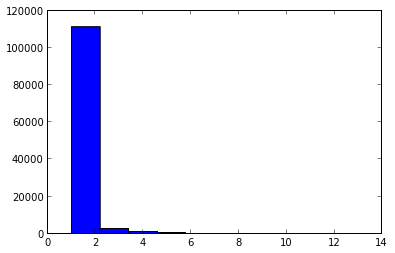

In [40]:
hist(ambiguity)

In [47]:
ambiguities = sorted([(len(l),k,l) for k,l in reverse.items()])
for n,_,l in ambiguities[-30:]:
    print n," ".join(l)

9 gee's geez geeze g's g.'s g.s jees jeez jeeze
9 caan caen con conn conn. kahn khan kohn kon
9 corey corrie corry cory coury kaori korey korry kory
9 kea kee key khe ki kyi qi quai quay
9 coal coale cole colle koehl koelle kohl kol kole
9 coo cou coup coups khoo khuu koo ku qu
9 cues 'cuse kuse kuze q's q.'s q.s ques queues
9 leu lew lieu loo lou louw loux lu lue
9 nicholls nichols nichols' nickel's nickels nickles nickols nicolls nicols
9 kneece kniess neace neece neice neiss nice niece niess
10 ais ayes eis eye's eyes eyes' i's i.'s i.s ise
10 barey barre barrie barry berrey berri berrie berry buerry bury
10 bailey bailie baillie bailly baily baley bally baylee bayley bayly
10 cay k k. 'kay kay kaye khe quai quay quaye
10 mauri maurie maury morey mori morrie morry mory mowrey mowry
10 kneale kneel neal neale neall neel neil neile neill niel
10 au aux eau eaux o o' o. oh ow owe
10 eaux oh's ohs ooohs o's o.'s o.s o.s' ose owes
10 reits reitz right's rights rights' rite's rites wright

In fact, there are many different possible relationships between words, meanings, sounds, and spellings.

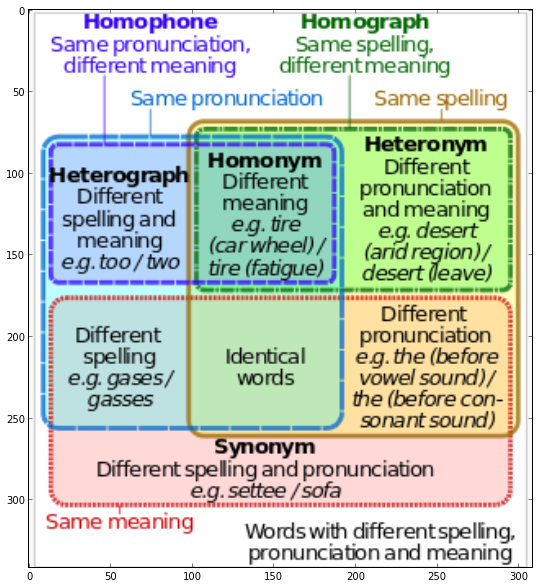

In [125]:
imshow(imread("word-relationships.png"))

# Swadesh Dictionaries

Created by Morris Swadesh, a list of words that exist in many languages.

These special wordlists of corresponding words are used 
for *glottochronology* and *lexicostatistics*.

Note that we are actually talking about *lemmas* here, since the words themselves may have multiple grammatical forms and be homographs.

In [48]:
from nltk.corpus import swadesh

In [51]:
fr2en = swadesh.entries(['fr','en'])
print fr2en[:10]

[('je', 'I'), ('tu, vous', 'you (singular), thou'), ('il', 'he'), ('nous', 'we'), ('vous', 'you (plural)'), ('ils, elles', 'they'), ('ceci', 'this'), ('cela', 'that'), ('ici', 'here'), ('l\xc3\xa0', 'there')]
[(u'je', u'I'), (u'tu, vous', u'you (singular), thou'), (u'il', u'he'), (u'nous', u'we'), (u'vous', u'you (plural)'), (u'ils, elles', u'they'), (u'ceci', u'this'), (u'cela', u'that'), (u'ici', u'here'), (u'l\xe0', u'there')]


# Toolbox Lexicons

Let's briefly mention another kind of lexicon, a "toolbox lexicon".
It's basically just a bunch of attributes on a word (usually a lemma).
The meaning is defined on a case-by-case basis.

Often, these kinds of lexica represent notes created by linguists when
studying a language (in fact, they are often captured on paper notecards
before being computerized).

In [1]:
from nltk.corpus import toolbox

In [3]:
toolbox.entries('rotokas.dic')[:2]

[('kaa',
  [('ps', 'V'),
   ('pt', 'A'),
   ('ge', 'gag'),
   ('tkp', 'nek i pas'),
   ('dcsv', 'true'),
   ('vx', '1'),
   ('sc', '???'),
   ('dt', '29/Oct/2005'),
   ('ex', 'Apoka ira kaaroi aioa-ia reoreopaoro.'),
   ('xp', 'Kaikai i pas long nek bilong Apoka bikos em i kaikai na toktok.'),
   ('xe', 'Apoka is gagging from food while talking.')]),
 ('kaa',
  [('ps', 'V'),
   ('pt', 'B'),
   ('ge', 'strangle'),
   ('tkp', 'pasim nek'),
   ('arg', 'O'),
   ('vx', '2'),
   ('dt', '07/Oct/2006'),
   ('ex', 'Rera rauroro rera kaarevoi.'),
   ('xp', 'Em i holim pas em na nekim em.'),
   ('xe', 'He is holding him and strangling him.'),
   ('ex', 'Iroiro-ia oirato okoearo kaaivoi uvare rirovira kaureoparoveira.'),
   ('xp', 'Ol i pasim nek bilong man long rop bikos em i save bikhet tumas.'),
   ('xe',
    "They strangled the man's neck with rope because he was very stubborn and arrogant."),
   ('ex',
    'Oirato okoearo kaaivoi iroiro-ia. Uva viapau uvuiparoi ra vovouparo uva kopiiroi.'),
 